R environment

In [ ]:
suppressPackageStartupMessages({
    library(ggplot2)
    library(data.table)
    library(Seurat)
    library(dplyr)
    library(tidyr)
    library(tibble)
    library(stringr)
    library(dittoSeq)
    library(patchwork)
    library(future)
    plan("multiprocess", workers = 8)
    options(future.globals.maxSize = 1000 * 1024^5)
    options(stringsAsFactors = FALSE)
    set.seed(123)
})

In [ ]:
gbm <- readRDS('data/Ruiz2021_manual_annotation.rds')

In [ ]:
gbm_mapped <- readRDS('data/mapped_Ruiz2021_to_core_GBmap.rds')

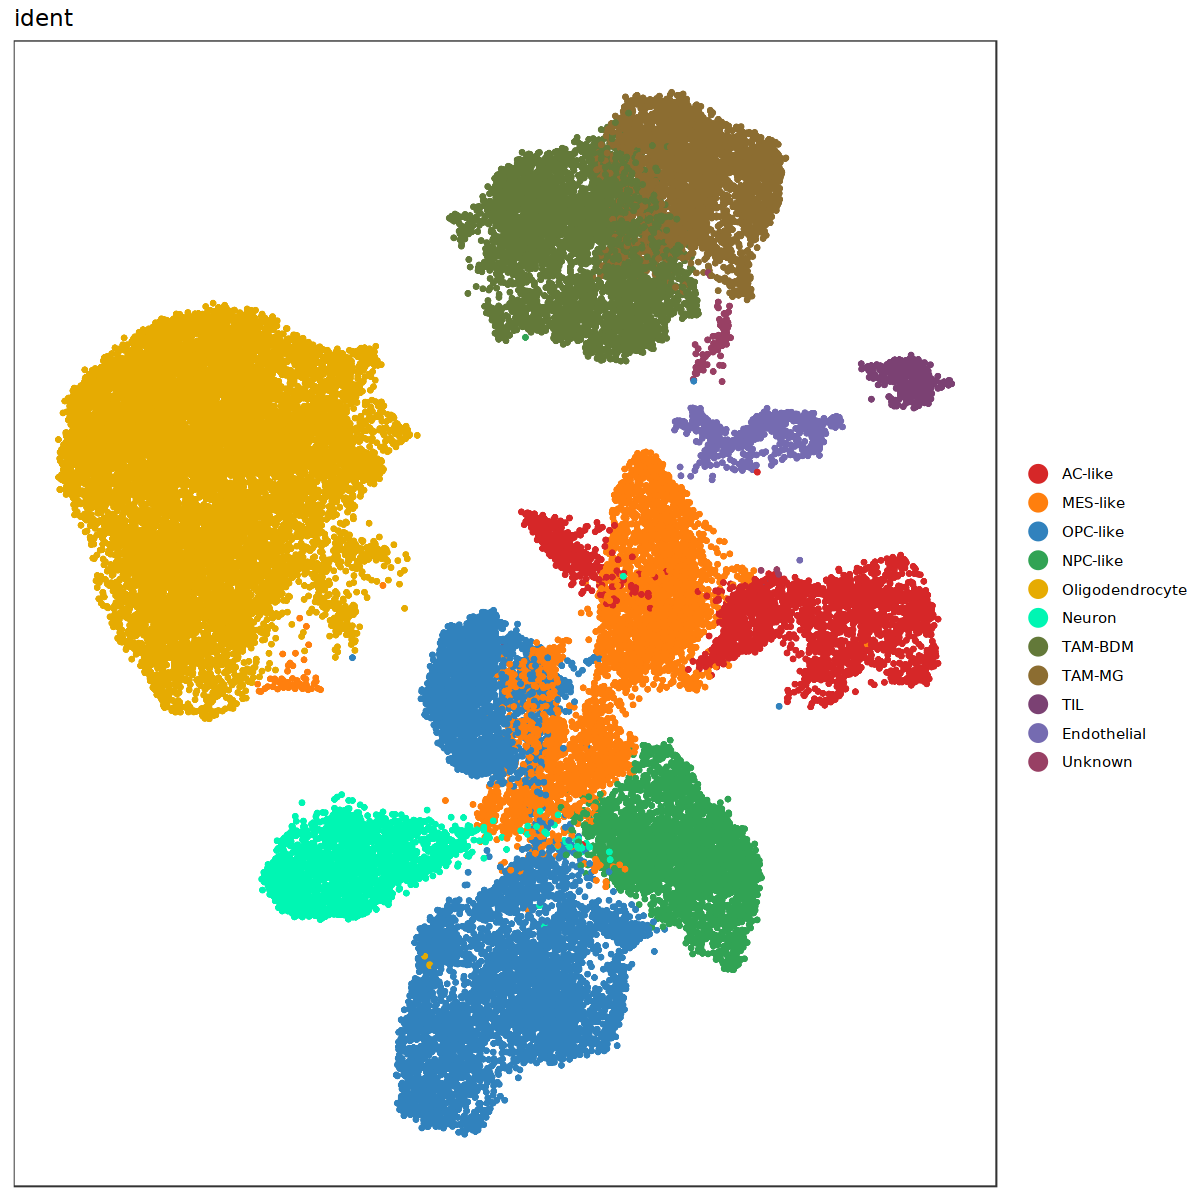

In [ ]:
options(repr.plot.height = 10, repr.plot.width = 10)
dittoDimPlot(gbm, 
             reduction.use = "umap", var = "ident", 
             color.panel = c(c('#d62728', '#ff7f0e', '#3182bd','#31a354',
               '#e6ab02', '#00F6B3',
               '#637939','#8c6d31',
                '#7b4173',
                '#756bb1','#984064')),
            do.raster = TRUE,
            size = 1.5) + NoAxes() 

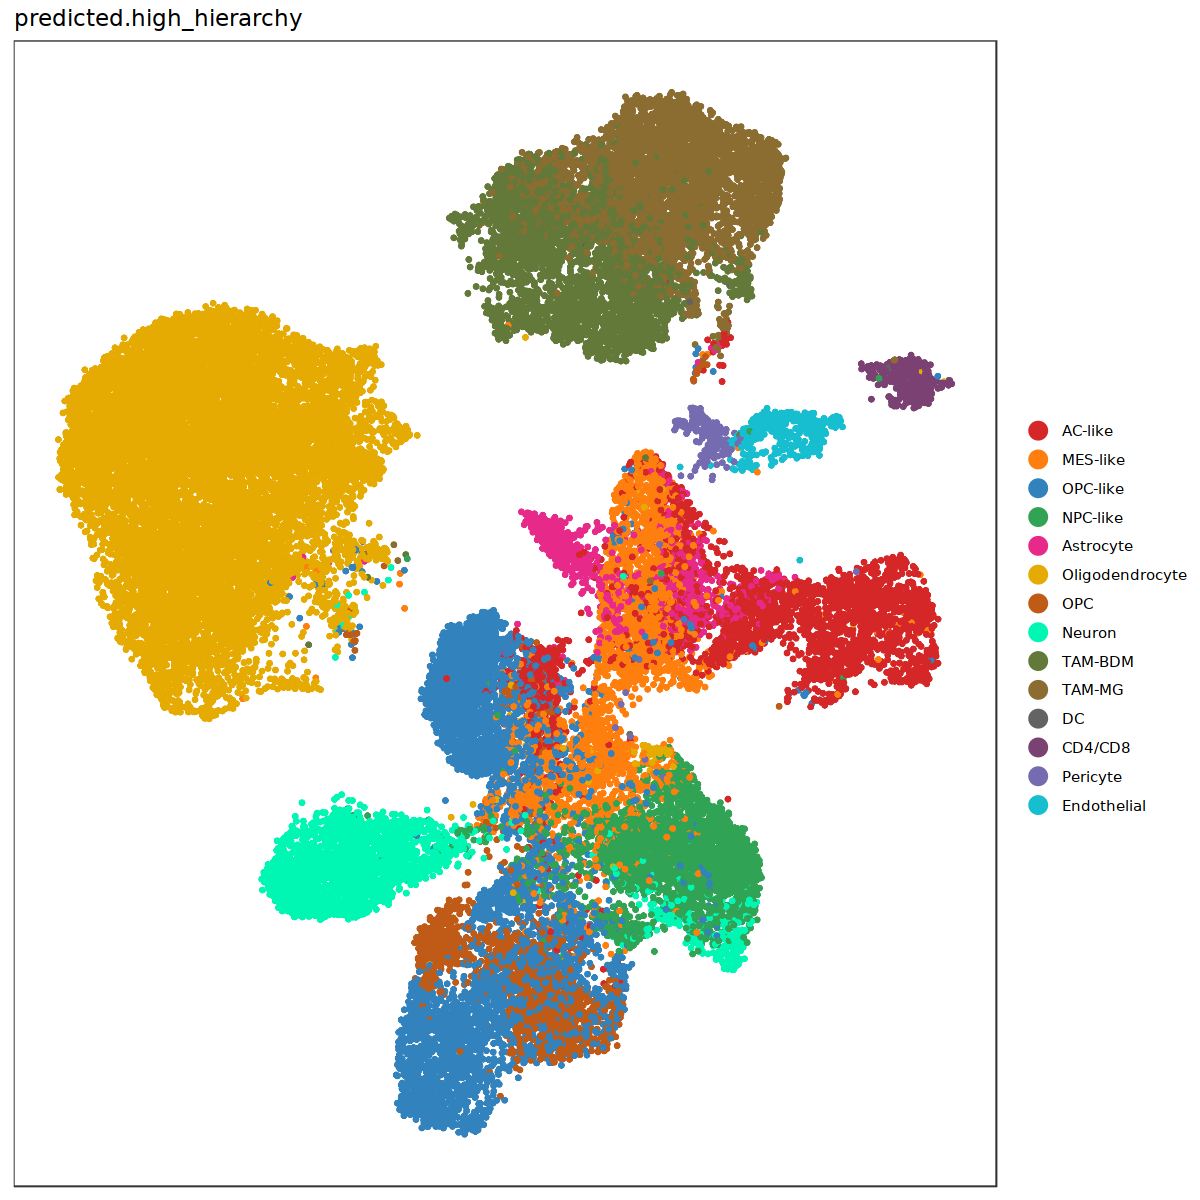

In [ ]:
options(repr.plot.height = 10, repr.plot.width = 10)
gbm$predicted.high_hierarchy <- gbm_mapped@meta.data$predicted.high_hierarchy

gbm@meta.data$predicted.high_hierarchy<- factor(x = gbm@meta.data$predicted.high_hierarchy, 
                                   levels = c('AC-like','MES-like','OPC-like','NPC-like',
     'Astrocyte','Oligodendrocyte','OPC','Neuron',
     'TAM-BDM','TAM-MG','DC',
     'CD4/CD8',
     'Pericyte','Endothelial'))

dittoDimPlot(gbm, 
             reduction.use = "umap", var = "predicted.high_hierarchy", 
            do.raster = TRUE,
            color.panel = c('#d62728', '#ff7f0e', '#3182bd','#31a354',
               '#e7298a','#e6ab02', '#bf5b17','#00F6B3',
               '#637939','#8c6d31','#636363',
                '#7b4173',
                '#756bb1','#17becf'),
            size = 1.5) + NoAxes() 

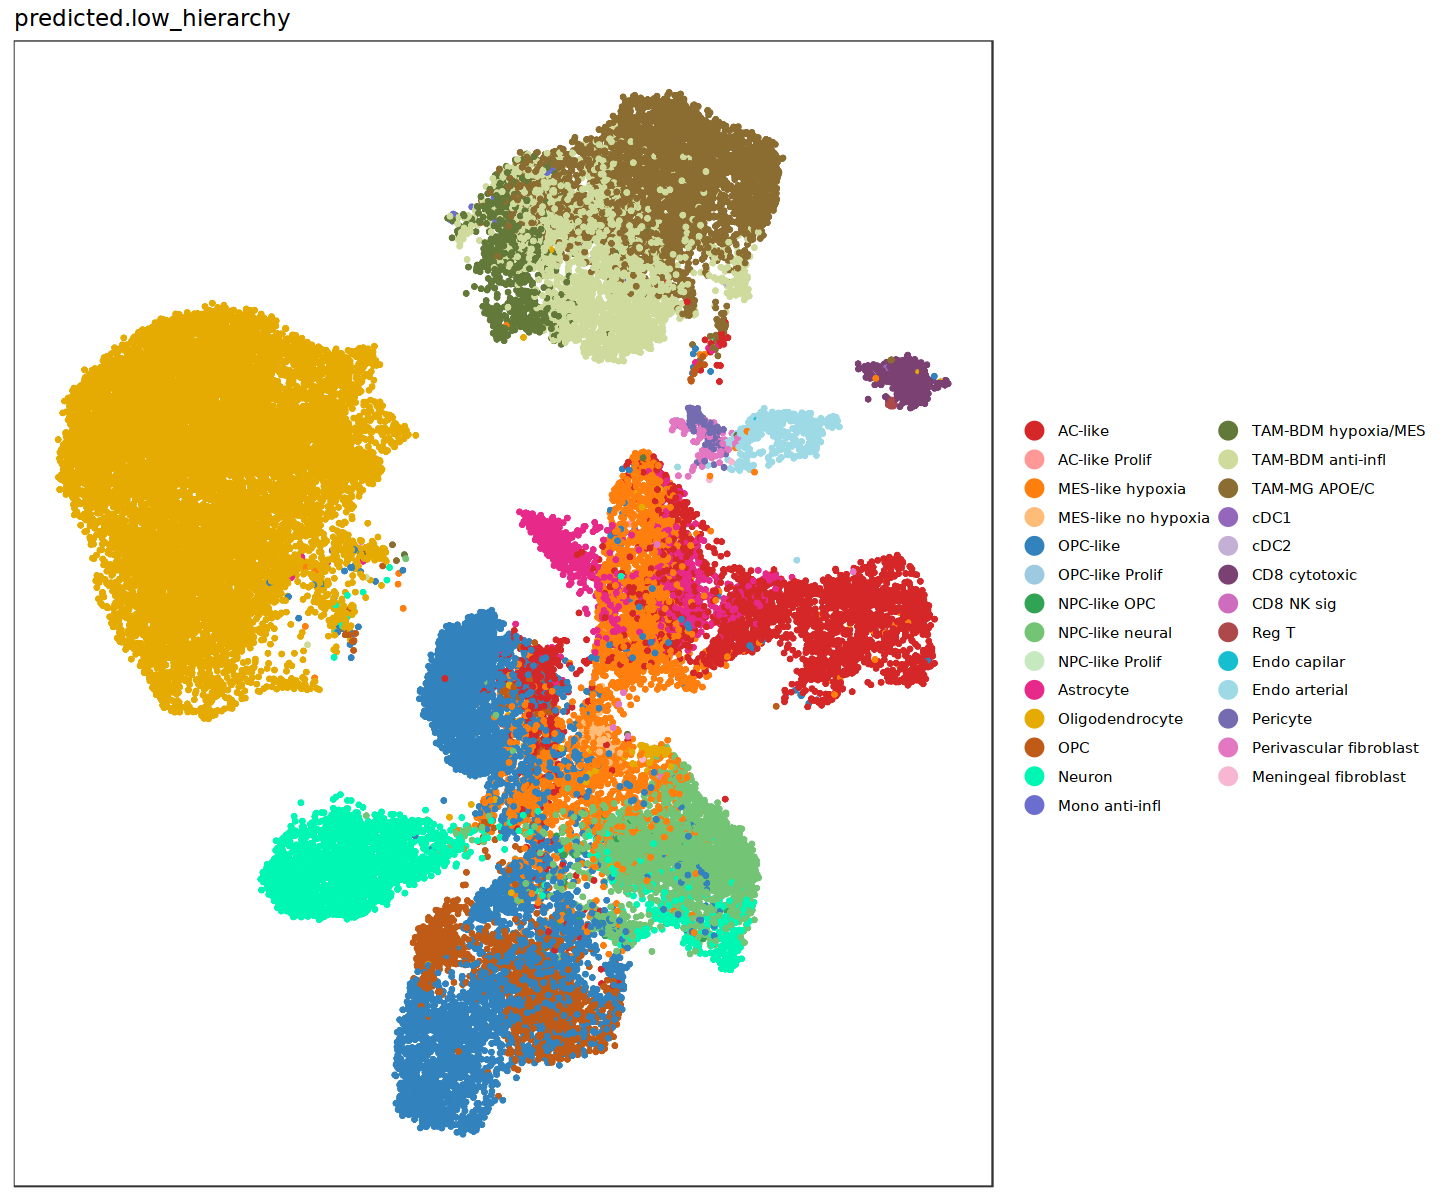

In [ ]:
options(repr.plot.height = 10, repr.plot.width = 12)
gbm$predicted.low_hierarchy <- gbm_mapped@meta.data$predicted.low_hierarchy

gbm@meta.data$predicted.low_hierarchy <- factor(x = gbm@meta.data$predicted.low_hierarchy, 
                                   levels = c('AC-like', 'AC-like Prolif','MES-like hypoxia','MES-like no hypoxia',
     'OPC-like','OPC-like Prolif','NPC-like OPC','NPC-like neural','NPC-like Prolif',
     'Astrocyte','Oligodendrocyte','OPC','Neuron',
     'Mono anti-infl',
     'TAM-BDM hypoxia/MES','TAM-BDM anti-infl',
     'TAM-MG APOE/C', 
     'cDC1','cDC2',
     'CD8 cytotoxic', 'CD8 NK sig','Reg T',
     'Endo capilar', 'Endo arterial',
     'Pericyte',
     'Perivascular fibroblast', 'Meningeal fibroblast'))

dittoDimPlot(gbm, 
             reduction.use = "umap", var = "predicted.low_hierarchy", 
            do.raster = TRUE,
            color.panel = c('#d62728', '#ff9896', '#ff7f0e','#ffbb78', #AC/MES
                    '#3182bd','#9ecae1','#31a354','#74c476','#c7e9c0', #OPC/NPC
                    '#e7298a','#e6ab02', '#bf5b17','#00F6B3', #glia
                    '#6b6ecf', #mono
                    '#637939','#cedb9c', #BDM
                    '#8c6d31', #MG
                    '#9467bd','#c5b0d5', #DC
                    '#7b4173','#ce6dbd', '#ad494a', #TIL
                    '#17becf', '#9edae5', #endo
                    '#756bb1', '#e377c2', '#f7b6d2'),
             size = 1.5
            ) + NoAxes() 

### Annotation comparison

In [ ]:
gbm$celltype_original <- Idents(gbm)
classTab <- data.frame(row.names = colnames(gbm), 
                       predicted = gbm@meta.data$predicted.high_hierarchy, 
                       original = gbm@meta.data$celltype_original)
classTab

,predicted,original
,<fct>,<fct>
NH16-2366_AAACCCAAGATCGCCC-1,TAM-MG,TAM-BDM
NH16-2366_AAACCCACACACTTAG-1,CD4/CD8,TIL
NH16-2366_AAACCCATCTTCCTAA-1,Oligodendrocyte,Oligodendrocyte
NH16-2366_AAAGAACCACATGACT-1,TAM-BDM,TAM-BDM
NH16-2366_AAAGAACTCAAGCTGT-1,Oligodendrocyte,Oligodendrocyte
NH16-2366_AAAGAACTCCATCTAT-1,CD4/CD8,TIL
NH16-2366_AAAGGATAGTTAGTAG-1,TAM-BDM,TAM-BDM
NH16-2366_AAAGGATGTCATGGCC-1,TAM-BDM,TAM-BDM
NH16-2366_AAAGGATTCTCGCTTG-1,TAM-BDM,TAM-BDM


In [ ]:
class <- classTab$predicted
ruizClass <- classTab$original

table(class, ruizClass)
chisq.test(table(class, ruizClass))

                 ruizClass
class             AC-like MES-like OPC-like NPC-like Oligodendrocyte Neuron
  AC-like            1900      694      126        2               0      1
  MES-like             54     2346      140      234               8      4
  OPC-like             14      277     4810       64              22      4
  NPC-like              2       30      272     2324               1     55
  Astrocyte           500      573        7        0               4      0
  Oligodendrocyte       1       83        4       37           12587      1
  OPC                   0       37     1522        0              18      0
  Neuron                0        3       15      304              13   1989
  TAM-BDM               0        3        2        2               2      0
  TAM-MG                0        2        0        0               6      0
  DC                    1        0        1        0               0      0
  CD4/CD8               0        0        0        0         

Warning message in chisq.test(table(class, ruizClass)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(class, ruizClass)
X-squared = 272966, df = 130, p-value < 2.2e-16


In [ ]:
transMat <- as.data.frame(table(ruizClass, class), stringsAsFactors = F)
transMat$class <- factor(transMat$class, levels = names(table(gbm@meta.data$predicted.high_hierarchy)))
transMat$ruizClass <- factor(transMat$ruizClass, levels = names(table(gbm@meta.data$celltype_original)))

In [ ]:
transMat <- as.data.frame(table(ruizClass, class), stringsAsFactors = F)
transMat$class <- factor(transMat$class, 
                         levels = c('AC-like','MES-like','OPC-like','NPC-like',
     'Astrocyte','Oligodendrocyte','OPC','Neuron',
     'TAM-BDM','TAM-MG','DC',
     'CD4/CD8',
     'Pericyte','Endothelial'))
transMat$ruizClass <- factor(transMat$ruizClass, 
                             levels = c('AC-like','MES-like','OPC-like','NPC-like',
     'Oligodendrocyte','Neuron',
     'TAM-BDM','TAM-MG',
     'TIL',
     'Endothelial', 'Unknown'))

In [ ]:
saveRDS(transMat, 'data/comparison_manual_vs_predicted_Ruiz2022.rds')